# Lab Two: Classification
##### Laura Ahumada, Shikha Pandey, Kevin Boyd, Duy Nguyen

### Libraries

In [45]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn import metrics as mt
import matplotlib.pyplot as plt
from sklearn.svm import SVC

### Import Data

In [2]:
df = pd.read_csv('adult.csv')

In [3]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


# Data Preparation: Part 1
- ##### Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis.

In [4]:
df.isnull().values.any()

False

In [5]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [6]:
cat_cols = df.select_dtypes(exclude=['int64','int32'])
for i in cat_cols:
    print(cat_cols[i].value_counts().sort_index().index)

Index(['?', 'Federal-gov', 'Local-gov', 'Never-worked', 'Private',
       'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay'],
      dtype='object')
Index(['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th',
       'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad',
       'Masters', 'Preschool', 'Prof-school', 'Some-college'],
      dtype='object')
Index(['Divorced', 'Married-AF-spouse', 'Married-civ-spouse',
       'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed'],
      dtype='object')
Index(['?', 'Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial',
       'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct',
       'Other-service', 'Priv-house-serv', 'Prof-specialty', 'Protective-serv',
       'Sales', 'Tech-support', 'Transport-moving'],
      dtype='object')
Index(['Husband', 'Not-in-family', 'Other-relative', 'Own-child', 'Unmarried',
       'Wife'],
      dtype='object')
Index(['Amer-Indian-Eskimo', 'Asian

### Things to address:
- ##### ? values
- ##### Decrease categories in native.countries to immigrants or not (1 or 0)
- ##### Encode response variable "income" to 1 or 0
- ##### Encode "sex" into "IsMale"
- ##### Encode all categorical variables to 1 or 0, rather than ranked numbers

In [7]:
df.isin(['?']).sum(axis=0) * 100 / len(df)

age               0.000000
workclass         5.638647
fnlwgt            0.000000
education         0.000000
education.num     0.000000
marital.status    0.000000
occupation        5.660146
relationship      0.000000
race              0.000000
sex               0.000000
capital.gain      0.000000
capital.loss      0.000000
hours.per.week    0.000000
native.country    1.790486
income            0.000000
dtype: float64

In [8]:
df = df.replace({'?':'Unknown'})

In [9]:
df.isin(['?']).sum(axis=0) * 100 / len(df)

age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education.num     0.0
marital.status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital.gain      0.0
capital.loss      0.0
hours.per.week    0.0
native.country    0.0
income            0.0
dtype: float64

- ##### "Native Country": Replace Non-US with "Immigrant"

In [10]:
if 'native.country' in df:
    df['IsImmigrant'] = np.where(df['native.country']!= 'United-States', 1, 0)
    del df['native.country']

In [11]:
df.IsImmigrant.value_counts(normalize=True) * 100

0    89.585701
1    10.414299
Name: IsImmigrant, dtype: float64

- ##### "Income": One-hot

In [12]:
df.income.value_counts(normalize=True) * 100

<=50K    75.919044
>50K     24.080956
Name: income, dtype: float64

In [13]:
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1}).astype(int) 

In [14]:
df.income.value_counts(normalize=True) * 100

0    75.919044
1    24.080956
Name: income, dtype: float64

- ##### Encoding Categorical Variables in Dummies

In [15]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
income             int32
IsImmigrant        int32
dtype: object

In [16]:
df_continuous = df.select_dtypes(exclude=['object'])
df_discrete = df.select_dtypes(exclude=['int64','int32'])

In [17]:
df_continuous

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income,IsImmigrant
0,90,77053,9,0,4356,40,0,0
1,82,132870,9,0,4356,18,0,0
2,66,186061,10,0,4356,40,0,0
3,54,140359,4,0,3900,40,0,0
4,41,264663,10,0,3900,40,0,0
...,...,...,...,...,...,...,...,...
32556,22,310152,10,0,0,40,0,0
32557,27,257302,12,0,0,38,0,0
32558,40,154374,9,0,0,40,1,0
32559,58,151910,9,0,0,40,0,0


In [18]:
df_discrete

,workclass,education,marital.status,occupation,relationship,race,sex
0,Unknown,HS-grad,Widowed,Unknown,Not-in-family,White,Female
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female
2,Unknown,Some-college,Widowed,Unknown,Unmarried,Black,Female
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female
...,...,...,...,...,...,...,...
32556,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male
32557,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female
32558,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male
32559,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female


In [19]:
df_discrete_dum = pd.get_dummies(df_discrete)

In [20]:
df = pd.concat([df_continuous, df_discrete_dum], axis = 1)

In [21]:
df

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income,IsImmigrant,workclass_Federal-gov,workclass_Local-gov,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
0,90,77053,9,0,4356,40,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,82,132870,9,0,4356,18,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,66,186061,10,0,4356,40,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
3,54,140359,4,0,3900,40,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
4,41,264663,10,0,3900,40,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,310152,10,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
32557,27,257302,12,0,0,38,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
32558,40,154374,9,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
32559,58,151910,9,0,0,40,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0


- ##### Separate Features from Response (Prep for Models)

In [33]:
x = df.drop("income", axis = 1)

In [71]:
x

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,IsImmigrant,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
0,90,77053,9,0,4356,40,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,82,132870,9,0,4356,18,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,66,186061,10,0,4356,40,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
3,54,140359,4,0,3900,40,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
4,41,264663,10,0,3900,40,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,310152,10,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
32557,27,257302,12,0,0,38,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
32558,40,154374,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
32559,58,151910,9,0,0,40,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0


In [72]:
x.columns

Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week', 'IsImmigrant', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Unknown', 'workclass_Without-pay',
       'education_10th', 'education_11th', 'education_12th',
       'education_1st-4th', 'education_5th-6th', 'education_7th-8th',
       'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc',
       'education_Bachelors', 'education_Doctorate', 'education_HS-grad',
       'education_Masters', 'education_Preschool', 'education_Prof-school',
       'education_Some-college', 'marital.status_Divorced',
       'marital.status_Married-AF-spouse', 'marital.status_Married-civ-spouse',
       'marital.status_Married-spouse-absent', 'marital.status_Never-married',
       'marital.status_Separated', 'marital.status_Widowed',
       'occupa

In [ ]:
df.

In [35]:
y = df[["income"]] # this returns a dataframe, better suited for model functions
                   # rather than df["income"]

In [36]:
y

,income
0,0
1,0
2,0
3,0
4,0
...,...
32556,0
32557,0
32558,1
32559,0


- ##### Scaling the Data

In [37]:
scaled_x = StandardScaler().fit_transform(x)
scaled_x

array([[ 3.76961234, -1.06799736, -0.42005962, ...,  0.4130197 ,
         1.42233076, -1.42233076],
       [ 3.18311167, -0.53916866, -0.42005962, ...,  0.4130197 ,
         1.42233076, -1.42233076],
       [ 2.01011032, -0.03521956, -0.03136003, ..., -2.421192  ,
         1.42233076, -1.42233076],
       ...,
       [ 0.10398314, -0.33543266, -0.42005962, ...,  0.4130197 ,
        -0.70307135,  0.70307135],
       [ 1.42360965, -0.35877741, -0.42005962, ...,  0.4130197 ,
         1.42233076, -1.42233076],
       [-1.21564337,  0.11095988, -0.42005962, ...,  0.4130197 ,
        -0.70307135,  0.70307135]])

### Dimension Reduction with PCA
- ##### Kaiser Rule: the goal is to seek number of PCs that have eigenvalues >= 1, hence the dotted red line below

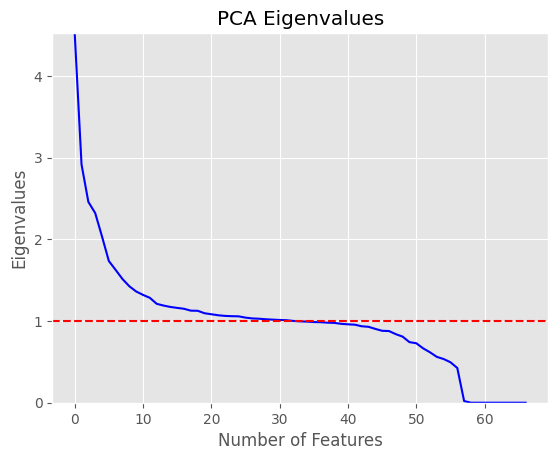

33 feature(s) are enough to describe the data.


In [145]:
pca = PCA(n_components=None) # initially set n_components to "None" to include all 67 features
pca.fit(scaled_x)

plt.ylabel('Eigenvalues')
plt.xlabel('Number of Features')
plt.title('PCA Eigenvalues')
plt.ylim(0, max(pca.explained_variance_))
plt.plot(pca.explained_variance_, color='b')
plt.axhline(y=1, color='r', linestyle='--')
plt.show()

# display the actual eigenvalues
count = 0
for i in pca.explained_variance_ :
    if i > 1 :                       # eigenvalues >= 1
        count = count + 1
print(count, 'feature(s) are enough to describe the data.')

- ##### Cumulative Variance Explained: the selected PCs should describe atleast 80% of the data, hence the dotted red line below

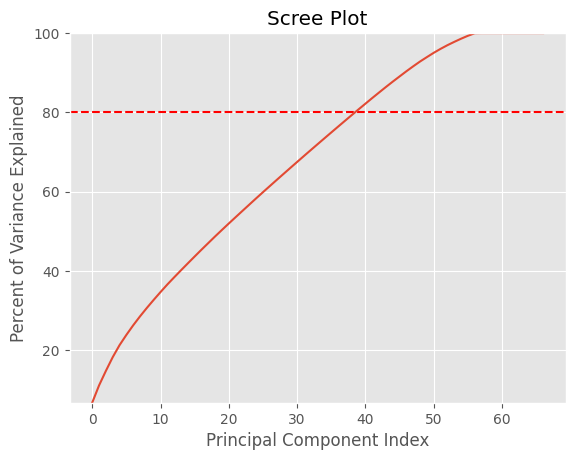

28 principal components(s) describe atleast 80% of the data.


In [147]:
variance = pca.explained_variance_ratio_ * 100
cumu_variance = np.cumsum(variance)

plt.ylabel('Percent of Variance Explained')
plt.xlabel('Principal Component Index')
plt.title('Scree Plot')
plt.ylim(min(cumu_variance), 100)
plt.axhline(y=80, color='r', linestyle='--')
plt.plot(cumu_variance)
plt.show()

cumu_variance
# display the actual eigenvalues
count = 0
for i in cumu_variance :
    if i > 80 :                       # eigenvalues >= 1
        count = count + 1
print(count, 'principal components(s) describe atleast 80% of the data.')

# Data Preparation: Part 2
- ##### Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created). 

Our goal with this final dataset is to classify whether if people have greater than $50k income or not, which includes 1 response variable and 67 predictor variables. Out of those 67, 6 are unchanged as they are originally continuous, 1 was originally "native.country" which was one-hot encoded to "IsImmigrant" (with "United States" as "0" and others as "1"), and the rest 60 are one-hot encoded as dummies.

PCA is not an appropriate pre-processing method for our data, since we have too many PCs that efficiently describes our data.

- ##### Splitting the Data

In [38]:
x_train, x_test, y_train, y_test = train_test_split(scaled_x, y, test_size = .2, random_state=1)
# 80% train, 20% test
# seed = 1

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt

lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None, solver='liblinear' )

iter_num=0

for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)):
    lr_clf.fit(X[train_indices],y[train_indices])  # train object
    y_hat = lr_clf.predict(X[test_indices]) # get test set precitions

    # print the accuracy and confusion matrix 
    print("====Iteration",iter_num," ====")
    print("accuracy", mt.accuracy_score(y[test_indices],y_hat)) 
    print("confusion matrix\n",mt.confusion_matrix(y[test_indices],y_hat))

- # Interpreting Weights

In [ ]:
weights = lr_clf.coef_.T # take transpose to make a column vector
variable_names = df.columns
for coef, name in zip(weights,variable_names):
    print(name, 'has weight of', coef[0])

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


weights = pd.Series(lr_clf.coef_[0],index=df.columns)
weights.plot(kind='bar')
plt.show()

- # Finding Bad Variables

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

std_scl = StandardScaler()
lr_clf = LogisticRegression(penalty='l2', C=0.05, solver='liblinear') 

piped_object = Pipeline([('scale', std_scl),  # do this
                         ('logit_model', lr_clf)]) # and then do this

weights = []

for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)):
    piped_object.fit(X[train_indices],y[train_indices])
    
    weights.append(piped_object.named_steps['logit_model'].coef_[0])
    

weights = np.array(weights)

In [ ]:
import plotly
plotly.offline.init_notebook_mode() # run at the start of every notebook

error_y=dict(
            type='data',
            array=np.std(weights,axis=0),
            visible=True
        )

graph1 = {'x': df.columns,
          'y': np.mean(weights,axis=0),
    'error_y':error_y,
       'type': 'bar'}

fig = dict()
fig['data'] = [graph1]
fig['layout'] = {'title': 'Logistic Regression Weights, with error bars'}

plotly.offline.iplot(fig)

- # Choosing Variables With Weight Greater Than |0.3| 

In [ ]:
Xnew = df[['age','education.num','capital.gain','hours.per.week','IsMale','education_Preschool','marital.status_Married-civ-spouse','marital.status_Never-married','relationship_Own-child','relationship_Wife']].values

weights = []
# run the pipline corssvalidated
for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(Xnew,y)):
    piped_object.fit(Xnew[train_indices],y[train_indices])  # train object
    weights.append(piped_object.named_steps['logit_model'].coef_[0])
    print("====Iteration",iter_num," ====")
    print("accuracy", mt.accuracy_score(y[test_indices],y_hat)) 
    print("confusion matrix\n",mt.confusion_matrix(y[test_indices],y_hat))
    
weights = np.array(weights)

error_y=dict(
            type='data',
            array=np.std(weights,axis=0),
            visible=True
        )

graph1 = {'x': ['age','education.num','capital.gain','hours.per.week','IsMale','education_Preschool','marital.status_Married-civ-spouse','marital.status_Never-married','relationship_Own-child','relationship_Wife'],
          'y': np.mean(weights,axis=0),
    'error_y':error_y,
       'type': 'bar'}

fig = dict()
fig['data'] = [graph1]
fig['layout'] = {'title': 'Logistic Regression Weights, with error bars'}

plotly.offline.iplot(fig)

# SVM

In [ ]:
num_cv_iterations = 3

cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2)
                         
print(cv_object)

In [ ]:
for train_indices, test_indices in cv_object.split(X,y): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
scl_obj = StandardScaler()
scl_obj.fit(X_train)
X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) 

In [ ]:
# lets investigate SVMs on the data and play with the parameters and kernels
from sklearn.svm import SVC

# train the model just as before
svm_clf = SVC(C=0.5, kernel='rbf', degree=3, gamma='auto') # get object
svm_clf.fit(X_train_scaled, y_train)  # train object

y_hat = svm_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf)

In [ ]:
# look at the support vectors
print(svm_clf.support_vectors_.shape)
print(svm_clf.support_.shape)
print(svm_clf.n_support_ )

In [ ]:
# Now let's do some different analysis with the SVM and look at the instances that were chosen as support vectors

# now lets look at the support for the vectors and see if we they are indicative of anything
# grabe the rows that were selected as support vectors (these are usually instances that are hard to classify)

# make a dataframe of the training data
df_tested_on = df.iloc[train_indices].copy() # saved from above, the indices chosen for training
# now get the support vectors from the trained model
df_support = df_tested_on.iloc[svm_clf.support_,:].copy()

df_support['income'] = y[svm_clf.support_] # add back in the 'Survived' Column to the pandas dataframe
df['income'] = y # also add it back in for the original data
df_support.info()

In [ ]:
# now lets see the statistics of these attributes
from pandas.plotting import boxplot

# group the original data and the support vectors
df_grouped_support = df_support.groupby([["income"]])
df_grouped = df.groupby([["income"]])

# plot KDE of Different variables
vars_to_plot = ['age','education.num','capital.gain','hours.per.week','IsMale','education_Preschool','marital.status_Married-civ-spouse','marital.status_Never-married','relationship_Own-child','relationship_Wife']

for v in vars_to_plot:
    plt.figure(figsize=(10,4))
    # plot support vector stats
    plt.subplot(1,2,1)
    ax = df_grouped_support[v].plot.kde() 
    plt.legend(['>50K','<=50K'])
    plt.title(v+' (Instances chosen as Support Vectors)')
    
    # plot original distributions
    plt.subplot(1,2,2)
    ax = df_grouped[v].plot.kde() 
    plt.legend(['>50K','<=50K'])
    plt.title(v+' (Original)')

In [ ]:
from matplotlib.colors import ListedColormap

def versiontuple(v):
    return tuple(map(int, (v.split("."))))

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)
        
# highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')


In [ ]:
# Visualize the decision boundaries
plot_decision_regions(X, y, classifier=svm_clf)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()